# SAMPLED FLAIR TRIALS

running flair models on a sample of the data, generating word clouds for a quick analysis.

THIS IS NOT MEANT TO BE A WRITE UP

Loading data from the flair processing, as well as defining functions

In [76]:
import json
import math
import pandas as pd
import wordcloud as wc
import matplotlib.pyplot as plt

FIN = 'flair_joined_tweets.json'

def clean_line(LINE):
    ## function used to take line from json file, and clean it
    # LINE @ pass in line from json file to be processed

    LINE = json.loads(LINE.rstrip()) # strip newline from end
    json.dumps(LINE) # get in json format

    return LINE

def get_nested_string(data):
    word_list = [word.lower() for nest in data if nest is not None for word in nest]

    string = " ".join(word_list)
    
    return string

def get_string(data):
    word_list = [word.lower() for word in data]

    string = " ".join(word_list)

    return string

def get_pos_string(data, POS):
  word_list = [word.lower() for pos_list in data for (word,tag) in pos_list if POS in tag]
  
  string = " ".join(word_list)

  return string

def create_wordcloud(STRING, FOUT = None):
    wordcloud = wc.WordCloud(
    stopwords= set(wc.STOPWORDS),
    width = 800, height = 800,
    background_color = "black",
    min_font_size = 10
    ).generate(STRING)

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    if FOUT is None:
      plt.show()
    else:
      plt.savefig(FOUT)

#######################
# Loading data
with open(FIN) as fin:

    data = [clean_line(line) for line in fin]  # make list of dictionaries

    df = pd.DataFrame(data)  # dump list of dictionaries to df

    fin.close()

pd.set_option('display.max_columns', None)
print(df.head())

                       created_at          place  \
0  Mon Feb 10 07:03:44 +0000 2020   Paradise, NV   
1  Mon Feb 10 07:04:49 +0000 2020     Queens, NY   
2  Mon Feb 10 07:05:30 +0000 2020      Tempe, AZ   
3  Mon Feb 10 07:07:14 +0000 2020  Oceanside, CA   
4  Mon Feb 10 07:09:05 +0000 2020      Miami, FL   

                                                text  \
0  Having a mocha and avoiding coronavirus at the...   
1         @LinSapna Our hearts ❤️ beat with China 🇨🇳   
2  people stop my sister in the street to make fu...   
3  @PoliticalAvengr @lookner @The_Dex_J @Marfoogl...   
4  Desafortunadamente, el fútbol chino se unió a ...   

                                                 pos  \
0  [[Having, VBG], [a, DT], [mocha, NN], [and, CC...   
1  [[@LinSapna, NNP], [Our, PRP$], [hearts, NNS],...   
2  [[people, NNS], [stop, VBP], [my, PRP$], [sist...   
3  [[@PoliticalAvengr, ADD], [@lookner, ADD], [@T...   
4  [[Desafortunadamente,, FW], [el, FW], [fútbol,...   

             

# Creating wordclouds for base text

1) all text

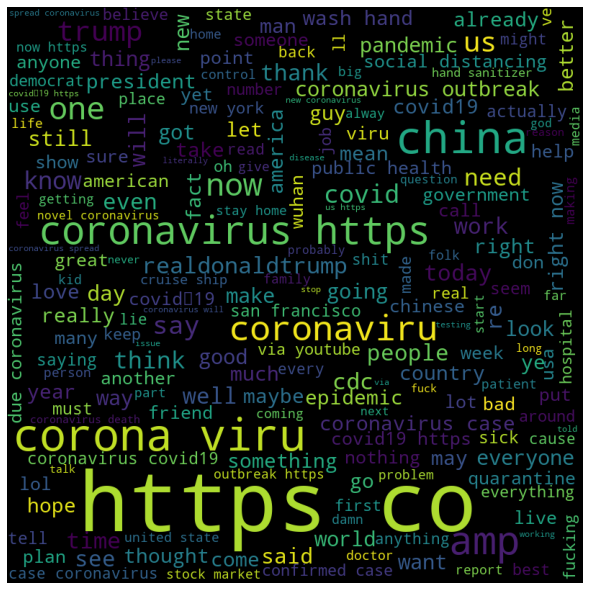

In [77]:
# getting wordcloud for all text
pos_tweet = get_string(df['text'])
create_wordcloud(pos_tweet)

2) positive sentiment texts

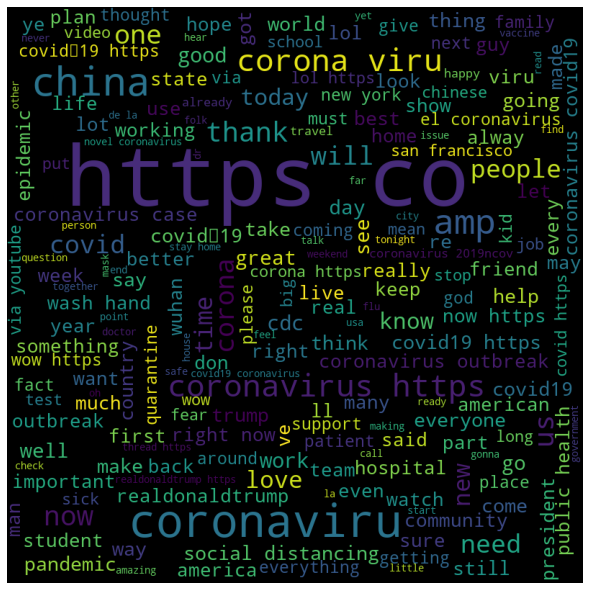

In [78]:
# getting wordcloud for positive sentiment text
pos_tweet = get_string(df[df['sentiment'] == 'POSITIVE']['text'])
create_wordcloud(pos_tweet)

3) negative sentiment texts

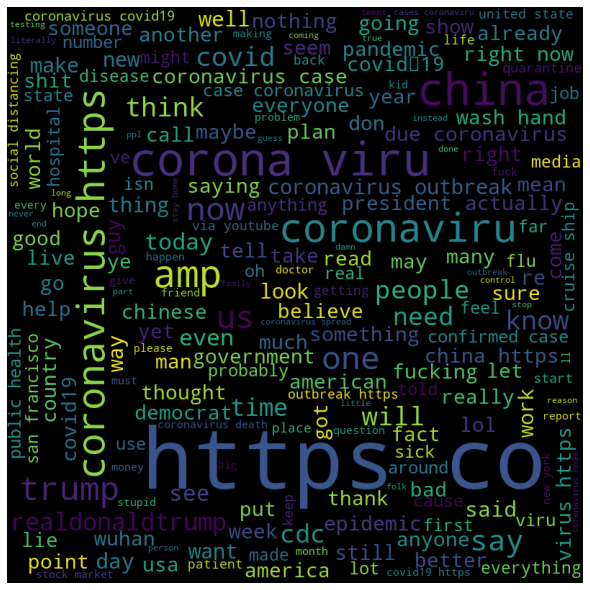

In [79]:
# getting wordcloud for negative sentiment text
neg_tweet = get_string(df[df['sentiment'] == 'NEGATIVE']['text'])
create_wordcloud(neg_tweet)

# Creating wordclouds for named entity recognition

1) all named entity recognition

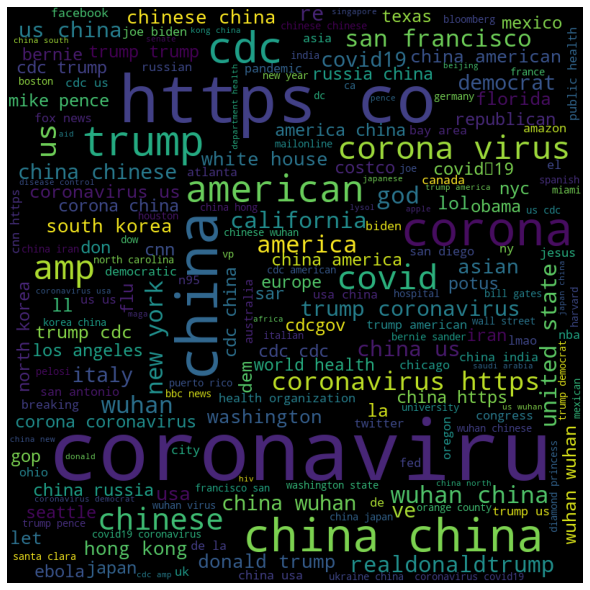

In [80]:
# getting wordcloud for named entity recognition
ner_string = get_nested_string(df['ner'])
create_wordcloud(ner_string)

2) positive sentiment named entity recognition

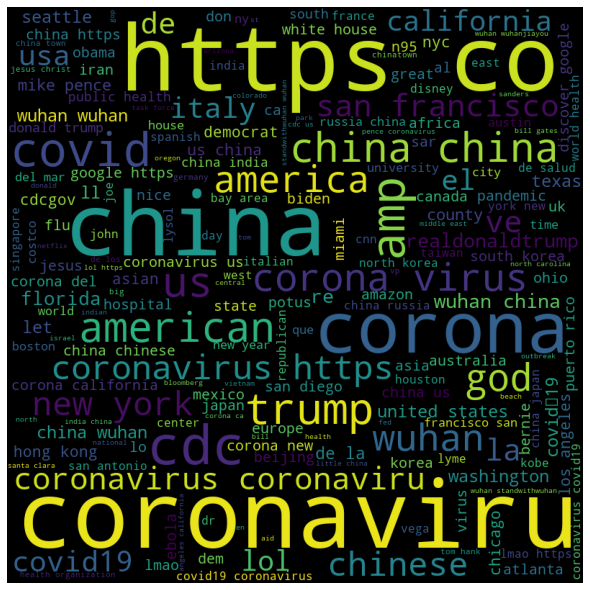

In [81]:
# getting wordcloud for positive sentiment NER
pos_tweet = get_nested_string(df[df['sentiment'] == 'POSITIVE']['ner'])
create_wordcloud(pos_tweet)

3) negative sentiment named entity recognition

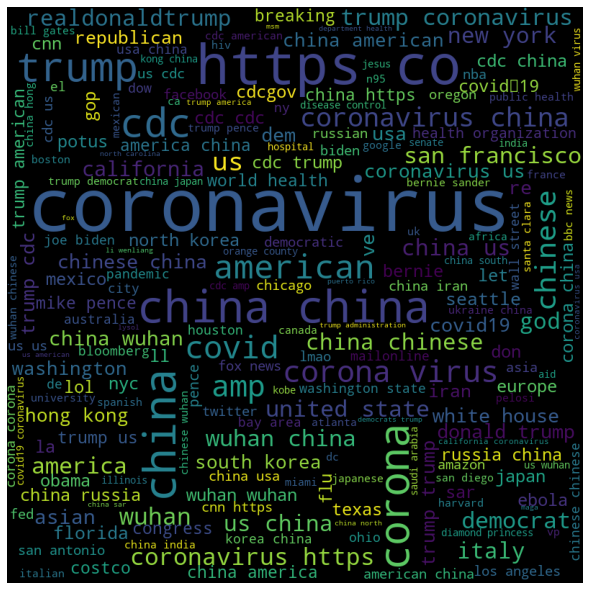

In [82]:
# getting wordcloud for negative sentiment NER
neg_tweet = get_nested_string(df[df['sentiment'] == 'NEGATIVE']['ner'])
create_wordcloud(neg_tweet)

# Creating word clouds for verbs

1) all verbs

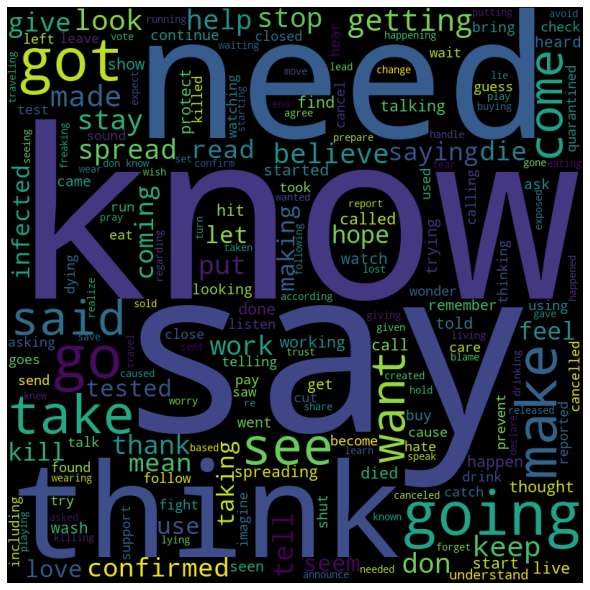

In [83]:
# getting wordclous for verbs only
pos_text = get_pos_string(df['pos'], 'V')
create_wordcloud(pos_text)

2) positive sentiment verbs

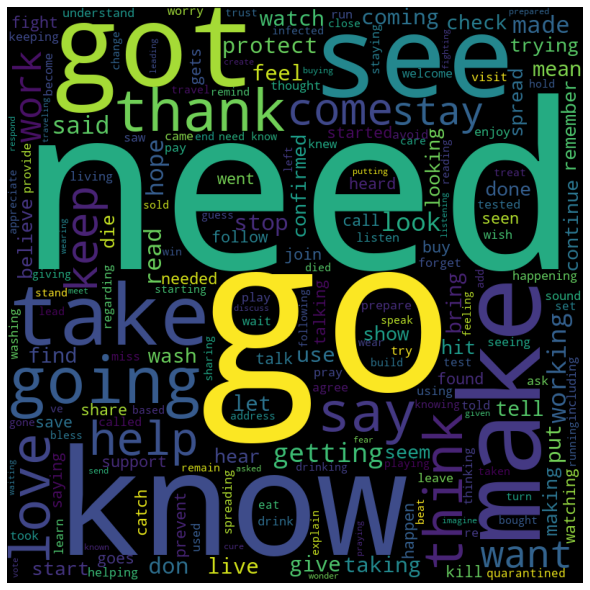

In [84]:
# getting wordclous for positive sentiment verbs only
pos_text = get_pos_string(df[df['sentiment'] == 'POSITIVE']['pos'], 'V')
create_wordcloud(pos_text)

3) negative sentiment verbs

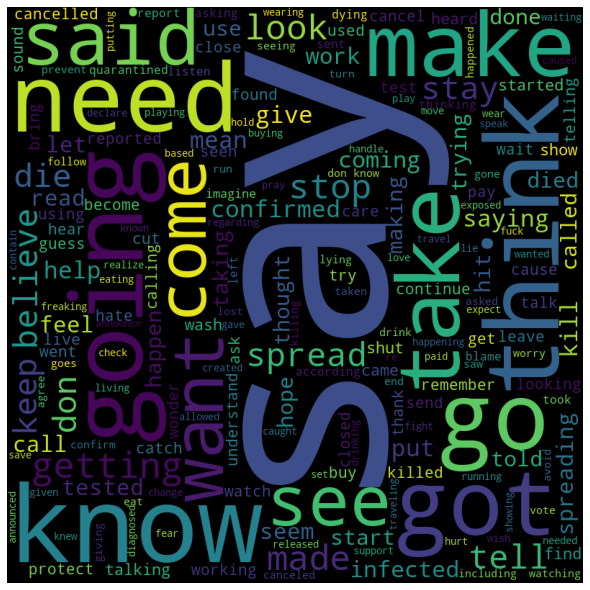

In [85]:
# getting wordclous for negative sentiment verbs only
pos_text = get_pos_string(df[df['sentiment'] == 'NEGATIVE']['pos'], 'V')
create_wordcloud(pos_text)